# Detecting the projection of a Chest X-ray image

There are two types of projections:
* AP :  This projection often is hazy and has less penetration, often taken from the front
* PA :  This projection has good contrast and more penetration. Should be easy to count vertebrae and often taken from the back so heart is less hazy.
  

In [77]:
# Read the data_entry_2017.csv file

import os

import pandas as pd
# Find the path of the archive directory
dir = os.path.dirname(os.getcwd())
archive_dir = os.path.join(dir, 'archive')
# Append the archive directory path to get the location of the csv file
csv_file_path = os.path.join(archive_dir, 'Data_Entry_2017.csv')

# Read the csv file
df = pd.read_csv(csv_file_path)


In [78]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [79]:
df = df[['Image Index', 'View Position']]

In [80]:
df.head()


,Image Index,View Position
0,00000001_000.png,PA
1,00000001_001.png,PA
2,00000001_002.png,PA
3,00000002_000.png,PA
4,00000003_000.png,PA


(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024, 4)
12 Image Index      00000004_000.png
View Position                  AP
Name: 12, dtype: object


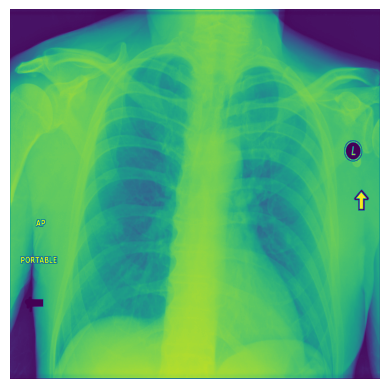

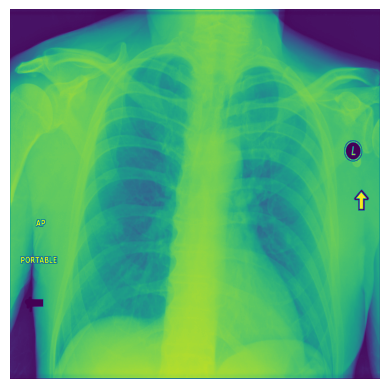

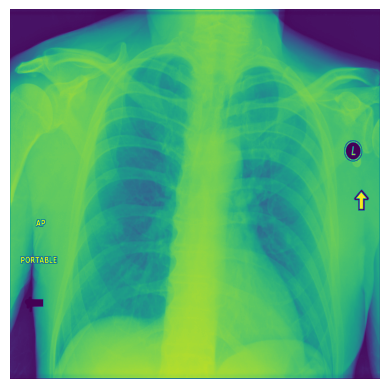

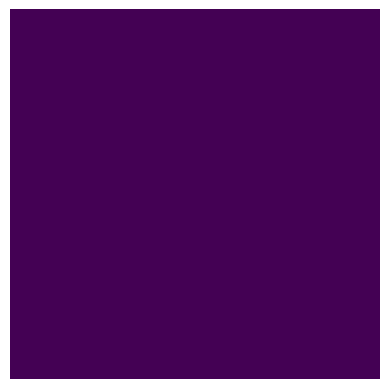

TypeError: an integer is required

In [85]:
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize

# Set the path to the images directory
images_dir = os.path.join(archive_dir, 'images_001/images')


# Load the images and labels
X = []
y = []

for index, row in df.head(100).iterrows():
    image_path = os.path.join(images_dir, row['Image Index'])
    image = imread(image_path)
    print(image.shape)
    if image.ndim == 3:
        print(index, row)
        import matplotlib.pyplot as plt

        plt.imshow(image[:,:,0])
        plt.axis('off')
        plt.show()
        plt.imshow(image[:,:,1])
        plt.axis('off')
        plt.show()
        plt.imshow(image[:,:,2])
        plt.axis('off')
        plt.show()
        plt.imshow(image[:,:,3])
        plt.axis('off')
        plt.show()
        
        if (image[:,:,2] == image[:,:,1]).all(True):
            print("True")
    
    image = resize(image, (200, 200), anti_aliasing=True)  # Resize the image to a fixed size
    X.append(image)
    y.append(row['View Position'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the image data
X_train = [image.flatten() for image in X_train]
X_test = [image.flatten() for image in X_test]



In [70]:
y_train_binary = [1 if label == 'PA' else 0 for label in y_train]

y_test_binary = [1 if label == 'PA' else 0 for label in y_test]

In [71]:
X_train[0].shape


(40000,)

In [72]:
len(y_train_binary)

80

In [58]:
# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train_binary)



SVC()

In [27]:
import numpy as np

In [59]:
from sklearn.metrics import accuracy_score

# Make predictions on the training set
y_train_pred = svm_model.predict(X_train)

# Calculate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train_binary, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.95


In [65]:
len(X_test)

20

In [61]:
# Make predictions on the test set
y_test_pred = svm_model.predict(X_test[0:18])
print(y_test_pred)
# Calculate the accuracy of the model

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [44]:
print(y_test_binary)

[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]


In [73]:
X_test[18].shape

(160000,)

In [52]:
y_test_pred.shape


(18,)